In [16]:
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from ydata_profiling import ProfileReport

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [15]:
!pip uninstall -y pandas-profiling
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 113.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7f0110f61ce4ed58235b454e6231aedd9b46d18fe58093992a78a70fb96212e1
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [17]:
#Seaborn settings for visualizations!
rc = {
    "axes.facecolor": "#f7f9fc",
    "figure.facecolor": "#f7f9fc",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

default_palette = 'YlOrRd'

sns.set(rc=rc)
pd.set_option('display.max_columns',35)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
from google.colab import files
data = files.upload()

Saving BD Incendie 2013-2023 Province Ouezzane.xlsx to BD Incendie 2013-2023 Province Ouezzane.xlsx


In [9]:
df = pd.read_excel('BD Incendie 2013-2023 Province Ouezzane.xlsx')

In [11]:
print(df.head())

   Num Incendie Date Départ feu Heure Départ feu Date Extinction  \
0           1.0      2013-04-25            11:45      2013-04-25   
1           2.0      2013-05-15            10:15      2013-05-15   
2           3.0      2013-06-30            14:27      2013-07-01   
3           4.0      2013-07-09            22:00      2013-07-10   
4           5.0      2013-10-03            22:00      2013-10-03   

  Heure Extinction  Durée (min)  Durée (heure)          Forêt       X       Y  \
0            14:15        150.0           2.50     Jbel Amzez  513762  476208   
1            13:00        165.0           2.75        Brikcha  487950  483151   
2            17:00       1593.0          26.55          Zoumi  504188  470859   
3            07:00        540.0           9.00        izarène  494460  474666   
4            23:00         60.0           1.00  Baidouz Dhari  466309  466785   

   ... Essence (plantes)    Cause Estimation (en DH) Int Avion  Int AL Int GR  \
0  ...                E

In [13]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')


The dataset has 111 rows and 22 columns


In [14]:
df.describe()

,Num Incendie,Date Départ feu,Date Extinction,Durée (min),Durée (heure),Estimation (en DH)
count,98.000000,98,98,98.000000,98.000000,98.000000
mean,49.500000,2018-09-03 20:04:53.877551104,2018-09-04 11:30:36.734693888,972.653061,16.210884,12545.377551
min,1.000000,2013-04-25 00:00:00,2013-04-25 00:00:00,30.000000,0.500000,30.000000
25%,25.250000,2016-01-17 06:00:00,2016-01-17 06:00:00,112.500000,1.875000,200.000000
50%,49.500000,2018-08-07 12:00:00,2018-08-08 12:00:00,292.500000,4.875000,550.000000
75%,73.750000,2021-07-27 12:00:00,2021-07-28 06:00:00,1294.000000,21.566667,2075.000000
max,98.000000,2023-09-29 00:00:00,2023-09-29 00:00:00,12000.000000,200.000000,481947.000000
std,28.434134,NaN,NaN,1771.616468,29.526941,64804.868801


In [18]:
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['Duplicate'] = df.duplicated().sum()
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['avg'] = desc['mean'].values
    summ['std dev'] = desc['std'].values
    summ['top value'] = desc['top'].values
    summ['Freq'] = desc['freq'].values

    return summ

In [19]:
summary(df).style.background_gradient()

,data type,#missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
Num Incendie,float64,13,1,98,1.000000,98.000000,49.500000,28.434134,nan,nan
Date Départ feu,datetime64[ns],13,1,94,2013-04-25 00:00:00,2023-09-29 00:00:00,2018-09-03 20:04:53.877551104,nan,nan,nan
Heure Départ feu,object,13,1,66,nan,nan,nan,nan,15:00,6
Date Extinction,datetime64[ns],13,1,92,2013-04-25 00:00:00,2023-09-29 00:00:00,2018-09-04 11:30:36.734693888,nan,nan,nan
Heure Extinction,object,13,1,44,nan,nan,nan,nan,19:00,6
Durée (min),float64,13,1,88,30.000000,12000.000000,972.653061,1771.616468,nan,nan
Durée (heure),float64,13,1,88,0.500000,200.000000,16.210884,29.526941,nan,nan
Forêt,object,13,1,17,nan,nan,nan,nan,Zoumi,23
X,object,5,1,102,nan,nan,nan,nan,505597.000000,2.000000
Y,object,5,1,102,nan,nan,nan,nan,456883,2


In [24]:
print(df.isnull().sum())


Num Incendie          13
Date Départ feu       13
Heure Départ feu      13
Date Extinction       13
Heure Extinction      13
Durée (min)           13
Durée (heure)         13
Forêt                 13
X                      5
Y                      5
Commune               13
Superficie (ha)       13
Essence (plantes)      2
Cause                 13
Estimation (en DH)    13
Int Avion             11
Int AL                13
Int GR                13
Int PC                13
Int FAR               13
Int FA                13
Int POP               13
dtype: int64


In [25]:
df = df.dropna()


In [43]:

def encode_column_values(x):
    if isinstance(x, str):  # Vérifier si la valeur est une chaîne de caractères
        return ', '.join([str(replace_dict_cause.get(item.strip(), item)) for item in x.split(',')])
    else:
        return x  # Si ce n'est pas une chaîne, retourner la valeur sans modification

# Appliquer cette fonction à toutes les colonnes concernées
df_encoded['Cause'] = df_encoded['Cause'].apply(encode_column_values)
df_encoded['Int Avion'] = df_encoded['Int Avion'].apply(encode_column_values)
df_encoded['Int AL'] = df_encoded['Int AL'].apply(encode_column_values)
df_encoded['Int GR'] = df_encoded['Int GR'].apply(encode_column_values)
df_encoded['Int PC'] = df_encoded['Int PC'].apply(encode_column_values)
df_encoded['Int FAR'] = df_encoded['Int FAR'].apply(encode_column_values)
df_encoded['Int FA'] = df_encoded['Int FA'].apply(encode_column_values)
df_encoded['Int POP'] = df_encoded['Int POP'].apply(encode_column_values)
df_encoded['Essence (plantes)'] = df_encoded['Essence (plantes)'].apply(encode_column_values)

# Afficher le dataframe après l'encodage
print(df_encoded.head())


   Num Incendie Date Départ feu Heure Départ feu Date Extinction  \
0          1.00      2013-04-25            11:45      2013-04-25   
1          2.00      2013-05-15            10:15      2013-05-15   
2          3.00      2013-06-30            14:27      2013-07-01   
3          4.00      2013-07-09            22:00      2013-07-10   
4          5.00      2013-10-03            22:00      2013-10-03   

  Heure Extinction  Durée (min)  Durée (heure)          Forêt       X       Y  \
0            14:15       150.00           2.50     Jbel Amzez  513762  476208   
1            13:00       165.00           2.75        Brikcha  487950  483151   
2            17:00     1,593.00          26.55          Zoumi  504188  470859   
3            07:00       540.00           9.00        izarène  494460  474666   
4            23:00        60.00           1.00  Baidouz Dhari  466309  466785   

     Commune Superficie (ha) Essence (plantes)    Cause  Estimation (en DH)  \
0  Mokrisset            0

In [45]:
# Afficher les colonnes disponibles dans le dataframe
print(df.columns)


Index(['Num Incendie', 'Date Départ feu', 'Heure Départ feu',
       'Date Extinction', 'Heure Extinction', 'Durée (min)', 'Durée (heure)',
       'Forêt', 'X', 'Y', 'Commune', 'Superficie (ha)', 'Essence (plantes)',
       'Cause', 'Estimation (en DH)', 'Int Avion', 'Int AL', 'Int GR',
       'Int PC', 'Int FAR', 'Int FA', 'Int POP'],
      dtype='object')


In [46]:
df['Superficie'] = df['Superficie (ha)']  # Superficie
df['Durée'] = df['Durée (min)']  # Durée en minutes

In [47]:
label_encoder = LabelEncoder()
df['Commune_encoded'] = label_encoder.fit_transform(df['Commune'])

In [48]:
df['Temps Extinction'] = (pd.to_datetime(df['Date Extinction']) - pd.to_datetime(df['Date Départ feu'])).dt.total_seconds() / 60  # Convertir en minutes

In [49]:
 #Vérifier si la colonne 'Temps Extinction' a été correctement créée
print(df[['Temps Extinction']].head())

   Temps Extinction
0              0.00
1              0.00
2          1,440.00
3          1,440.00
4              0.00


In [50]:
# Sélectionner les variables indépendantes et la cible
X = df[['Superficie', 'Durée', 'Commune_encoded']]  # Variables indépendantes
y = df['Temps Extinction']  # Variable cible

In [51]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Afficher les premières lignes des données d'entraînement
print(X_train.head())

   Superficie    Durée  Commune_encoded
49      11,00 2,420.00               12
70       0.02   750.00                8
68       1.30 1,320.00                6
15       0,05   390.00               13
39       2,70 1,155.00               13


In [59]:
# Convertir les valeurs avec des virgules (par exemple, '11,00') en format numérique
df['Superficie (ha)'] = df['Superficie (ha)'].replace({',': '.'}, regex=True).astype(float)
df['Durée (min)'] = df['Durée (min)'].replace({',': '.'}, regex=True).astype(float)

df['Estimation (en DH)'] = df['Estimation (en DH)'].replace({',': '.'}, regex=True).astype(float)

# Vérifier les premières lignes pour s'assurer que les conversions ont bien été effectuées
print(df[['Superficie (ha)', 'Durée (min)', 'Estimation (en DH)']].head())


   Superficie (ha)  Durée (min)  Estimation (en DH)
0             0.57       150.00           14,250.00
1             0.91       165.00            5,300.00
2             8.15     1,593.00           12,205.00
3             0.36       540.00            2,400.00
4             0.66        60.00            4,600.00


In [60]:
# Vérifier les types de chaque colonne
print(df.dtypes)

# Vérifier les valeurs non numériques dans les colonnes pertinentes
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(df[non_numeric_columns].head())


Num Incendie                 float64
Date Départ feu       datetime64[ns]
Heure Départ feu              object
Date Extinction       datetime64[ns]
Heure Extinction              object
Durée (min)                  float64
Durée (heure)                float64
Forêt                         object
X                             object
Y                             object
Commune                       object
Superficie (ha)              float64
Essence (plantes)             object
Cause                         object
Estimation (en DH)           float64
Int Avion                     object
Int AL                        object
Int GR                        object
Int PC                        object
Int FAR                       object
Int FA                        object
Int POP                       object
Superficie                    object
Durée                        float64
Commune_encoded                int64
Temps Extinction             float64
dtype: object
  Heure Départ feu Heure

In [61]:
# Convertir 'Heure Départ feu' et 'Heure Extinction' en format datetime
df['Heure Départ feu'] = pd.to_datetime(df['Heure Départ feu'], format='%H:%M', errors='coerce')
df['Heure Extinction'] = pd.to_datetime(df['Heure Extinction'], format='%H:%M', errors='coerce')

# Extraire l'heure en minutes (en cas de besoin)
df['Heure Départ feu (min)'] = df['Heure Départ feu'].dt.hour * 60 + df['Heure Départ feu'].dt.minute
df['Heure Extinction (min)'] = df['Heure Extinction'].dt.hour * 60 + df['Heure Extinction'].dt.minute

# Vérifier les résultats
print(df[['Heure Départ feu (min)', 'Heure Extinction (min)']].head())


   Heure Départ feu (min)  Heure Extinction (min)
0                     705                     855
1                     615                     780
2                     867                    1020
3                    1320                     420
4                    1320                    1380


In [62]:
# Convertir X et Y en numériques
df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')

# Vérifier
print(df[['X', 'Y']].head())


        X       Y
0  513762  476208
1  487950  483151
2  504188  470859
3  494460  474666
4  466309  466785


In [63]:
# Remplacer les virgules par des points dans 'Superficie'
df['Superficie'] = df['Superficie'].replace({',': '.'}, regex=True)

# Convertir en float
df['Superficie'] = pd.to_numeric(df['Superficie'], errors='coerce')

# Vérifier la conversion
print(df['Superficie'].head())


0   0.57
1   0.91
2   8.15
3   0.36
4   0.66
Name: Superficie, dtype: float64


In [64]:
from sklearn.preprocessing import LabelEncoder

# Encoder les colonnes catégorielles
label_encoder = LabelEncoder()

df['Forêt_encoded'] = label_encoder.fit_transform(df['Forêt'])
df['Essence (plantes)_encoded'] = label_encoder.fit_transform(df['Essence (plantes)'])
df['Cause_encoded'] = label_encoder.fit_transform(df['Cause'])

# Vérifier les résultats
print(df[['Forêt', 'Forêt_encoded', 'Essence (plantes)', 'Essence (plantes)_encoded', 'Cause', 'Cause_encoded']].head())


           Forêt  Forêt_encoded Essence (plantes)  Essence (plantes)_encoded  \
0     Jbel Amzez              5                ES                          8   
1        Brikcha              4            PC, CL                         19   
2          Zoumi             15                ES                          8   
3        izarène             16                PC                         18   
4  Baidouz Dhari              3            PC, PB                         25   

     Cause  Cause_encoded  
0    Connu              0  
1  Inconnu              1  
2  Inconnu              1  
3  Inconnu              1  
4  Inconnu              1  


In [65]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())


df = df.dropna()  # Supprimer les lignes contenant des valeurs manquantes

Num Incendie                 0
Date Départ feu              0
Heure Départ feu             0
Date Extinction              0
Heure Extinction             0
Durée (min)                  0
Durée (heure)                0
Forêt                        0
X                            0
Y                            0
Commune                      0
Superficie (ha)              0
Essence (plantes)            0
Cause                        0
Estimation (en DH)           0
Int Avion                    0
Int AL                       0
Int GR                       0
Int PC                       0
Int FAR                      0
Int FA                       0
Int POP                      0
Superficie                   0
Durée                        0
Commune_encoded              0
Temps Extinction             0
Heure Départ feu (min)       0
Heure Extinction (min)       0
Forêt_encoded                0
Essence (plantes)_encoded    0
Cause_encoded                0
dtype: int64


In [66]:
# Définir les variables indépendantes et dépendantes
X = df[['Superficie', 'X', 'Y', 'Forêt_encoded', 'Essence (plantes)_encoded', 'Cause_encoded', 'Durée (min)', 'Heure Départ feu (min)', 'Heure Extinction (min)']]
y = df['Temps Extinction']

# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Vérifier les résultats
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))


MAE: 2.748697625065688e-09
MSE: 9.68063985951854e-18


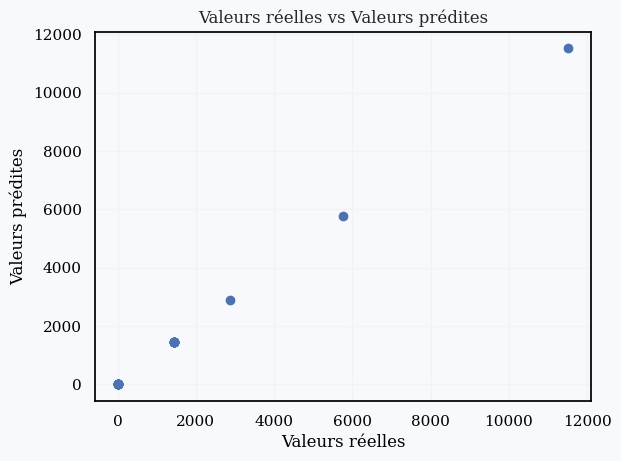

In [67]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Valeurs réelles vs Valeurs prédites')
plt.show()


In [68]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 1.27583692e-11  2.47579734e-14  1.97064587e-15  2.03963587e-11
  2.02538807e-11 -9.90976799e-10  1.00000000e+00  1.00000000e+00
 -1.00000000e+00]
Intercept: -1.3137196219759062e-08
